## Importing Libraries

In [1]:
from urllib.request import urlretrieve
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## Downloading Dataset

In [2]:
iris = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
urlretrieve(iris)

('/tmp/tmpj6m02iqc', <http.client.HTTPMessage at 0x7f371215a090>)

## EDA

In [3]:
df = pd.read_csv(iris, sep=',')

In [4]:
attributes = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"]
df.columns = attributes

In [5]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,Iris-setosa
1,4.7,3.2,1.3,0.2,Iris-setosa
2,4.6,3.1,1.5,0.2,Iris-setosa
3,5.0,3.6,1.4,0.2,Iris-setosa
4,5.4,3.9,1.7,0.4,Iris-setosa


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   class         149 non-null    object 
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


In [7]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369
std,0.828594,0.433499,1.759651,0.761292
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.400000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
# checking for null values
df.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [9]:
# number of classes present in the dataset
df["class"].value_counts()

Iris-versicolor    50
Iris-virginica     50
Iris-setosa        49
Name: class, dtype: int64

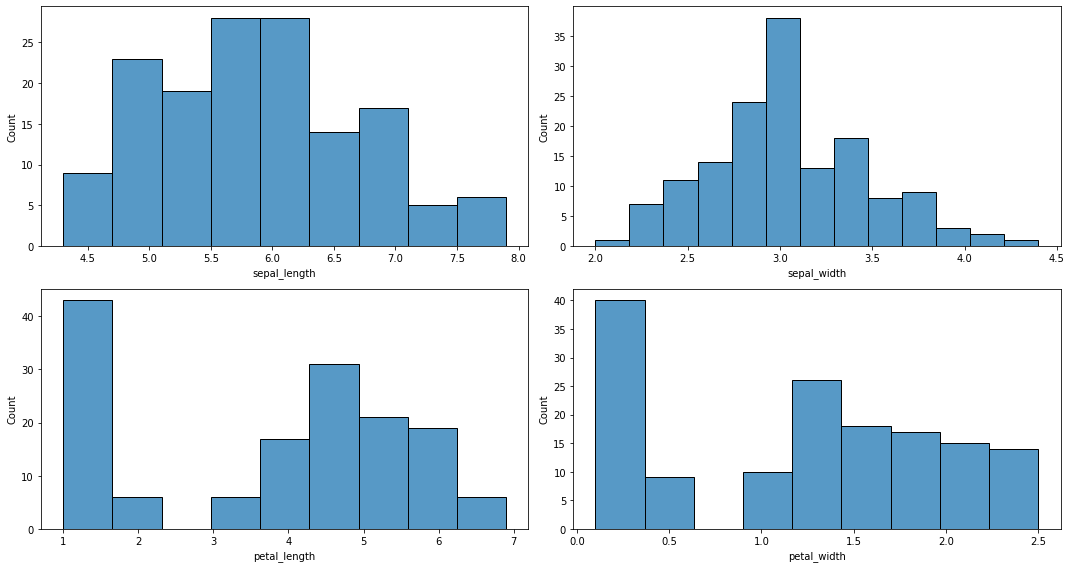

In [10]:
# hist plot
feature_col = df.drop(['class'],axis=1).columns
f, ax = plt.subplots(ncols = 2, nrows = 2, figsize=(15,2*len(feature_col)))

for i, c in zip(ax.flatten(), feature_col):
    sns.histplot(df[c], ax = i)
f.tight_layout()

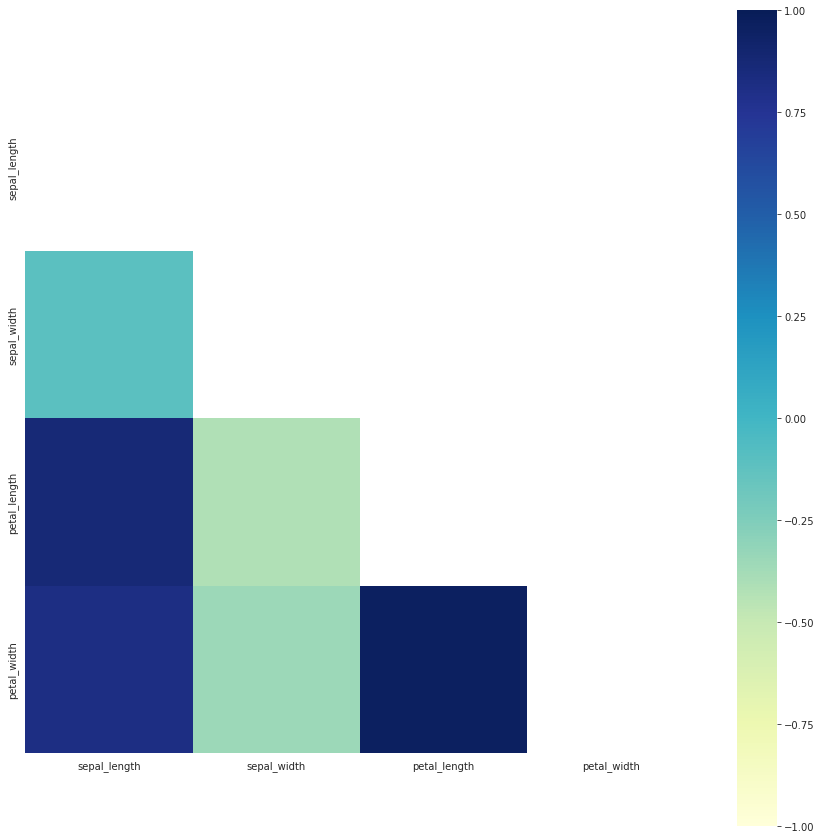

In [11]:
#  heatmap of correlation of columns with one another
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr, mask=mask, vmax=1,vmin=-1, square=True,cmap="YlGnBu",center=0)

In [12]:
corr

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.103784,0.871283,0.816971
sepal_width,-0.103784,1.000000,-0.415218,-0.350733
petal_length,0.871283,-0.415218,1.000000,0.962314
petal_width,0.816971,-0.350733,0.962314,1.000000


In [13]:
# grouping database having same class
df_setosa = df.loc[df['class'] == "Iris-setosa"]
df_versicolor = df.loc[df['class'] == "Iris-versicolor"]
df_virginica = df.loc[df['class'] == "Iris-virginica"]

In [14]:
feature_col = ["sepal_length","sepal_width"	,"petal_length","petal_width"]

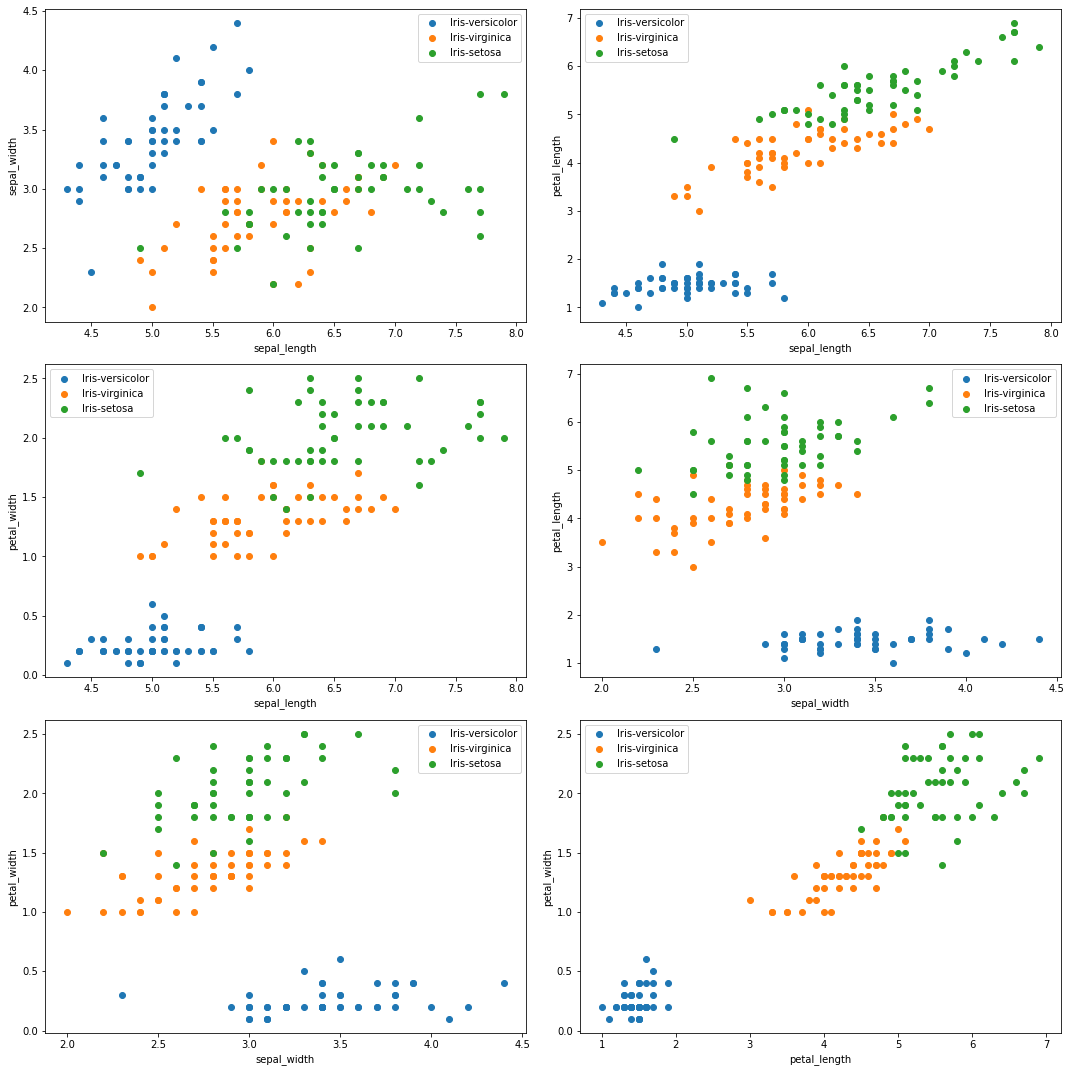

In [15]:
# scatter plot between each coloumn
i = 0
j = 0
f, ax = plt.subplots(ncols = 2, nrows = 3, figsize=(15,15))
for x in range(3):
    for y in range(i+1,4):
        ax[i][j].scatter(df_setosa[feature_col[x]],df_setosa[feature_col[y]])
        ax[i][j].scatter(df_versicolor[feature_col[x]],df_versicolor[feature_col[y]])
        ax[i][j].scatter(df_virginica[feature_col[x]],df_virginica[feature_col[y]])
        ax[i][j].set_xlabel(f'{feature_col[x]}')
        ax[i][j].set_ylabel(f'{feature_col[y]}')
        ax[i][j].legend(["Iris-versicolor","Iris-virginica","Iris-setosa"])
        if j==0:
            j=1
        else:
            j=0
            i+=1

f.tight_layout()
plt.show()

## Conclusion

* We see that Iris-versicolor is easily linearly separable
* Correlation between pedal width and pedal_length is maximum meaning they are highly related.